# Homework 4

- Execute the below code, then answer the numbered questions.

In [31]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0
...,...,...,...,...,...,...,...
9050,NaN,automatic,il,4.2,41186.0,NaN,11600.0
9051,ford,automatic,fl,NaN,38810.0,16250.0,17300.0
9052,nissan,NaN,ga,4.7,4551.0,12500.0,13800.0
9053,ford,automatic,il,4.6,33114.0,21800.0,27000.0


In [32]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['selling_price'], test_size=0.2, random_state=100)
numerical_features = ['auction_value','odometer','condition']
categorical_features = ['make','transmission','state']
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]

X_train_cat = pd.get_dummies(X_train[categorical_features], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_features], drop_first=True)

X_train_processed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_cat], axis=1)

print(f'Records in training data: {X_train_processed.shape[0]:,}')
print(f'Records in test data: {X_test_processed.shape[0]:,}')
print('\nNumerical Features:')
print(*numerical_features, sep='\n')
print('\nCategorical Features:')
print(*categorical_features, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Numerical Features:
auction_value
odometer
condition

Categorical Features:
make
transmission
state


## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [34]:
# insert code here
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
X_train_num_processed = numerical_pipeline.fit_transform(X_train_num)

X_test_num_processed = numerical_pipeline.transform(X_test_num)

In [35]:
X_test_num_processed

array([[-0.24129094, -0.55329312,  0.93975301],
       [ 0.39949227,  1.48635492, -0.59279332],
       [-0.011958  ,  0.14606965, -0.33736893],
       ...,
       [ 0.19713968, -0.14839527,  0.04576765],
       [-0.49085914, -0.28623065, -0.33736893],
       [ 0.83792289, -0.99207535,  0.17347984]])

In [36]:
X_train_num_processed

array([[-0.26827129, -0.18762983,  0.81204081],
       [ 0.74349168, -0.47935108,  0.68432862],
       [-0.74042734,  0.8616887 , -1.23135429],
       ...,
       [-0.54481983, -0.00260324,  0.55661643],
       [-0.84160364,  0.43391546, -0.33736893],
       [-0.51783949,  1.36295813,  0.81204081]])

## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [37]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
X_train_cat = cat_pipeline.fit_transform(X_train[categorical_features])

X_test_cat = cat_pipeline.transform(X_test[categorical_features])

In [38]:
X_train_cat.shape

(7244, 41)

In [39]:
X_test_cat.shape

(1811, 41)

## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [40]:
numerical_features = ['auction_value','odometer','condition']
categorical_features = ['make','transmission','state']

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

data_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

X_train_processed = data_pipeline.fit_transform(X_train)

print(f'Training data shape: {X_train_processed.shape}')
print(f'Training data missing values: {pd.DataFrame(X_train_processed).isna().sum().sum()}')

Training data shape: (7244, 44)
Training data missing values: 0


## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [41]:
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('data_processing', data_pipeline),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2_score = pipeline.score(X_test, y_test)

print(f'R2 score on the test data: {r2_score:.3f}')

R2 score on the test data: 0.884


## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

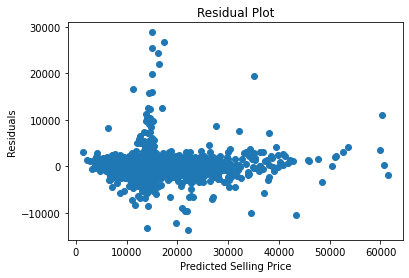

In [42]:
# insert code here
import matplotlib.pyplot as plt
y_pred = pipeline.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residual plot displays a U-shaped pattern, indicating that the model is perhaps underfitting the data and failing to capture some non-linear correlations between characteristics and selling price. To increase the model's performance, we may need to attempt a more complicated model, including interaction terms or polynomial features, or try various algorithms or regularization approaches.

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
numeric_features=['auction_value','odometer','condition']
categorical_features=['make','transmission','state'] 

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=100))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print(f'R2 score for Ridge regression model with alpha=100: {r2:.3f}')


R2 score for Ridge regression model with alpha=100: 0.883
